In [1]:
from pprint import pprint
import time
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import csv
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import math

# S&P500 Data

In [2]:
curr_time = int(time.time())
#prior_year = curr_time-(60*60*24*365)
prior_year=1543622400
ticker_symbol = "^GSPC"

In [3]:

url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/get-histories"

querystring = {"region":"US","lang":"en","symbol":ticker_symbol,"from":prior_year,"to":curr_time,"events":"div","events":"split","events":"earn","interval":"1d"}

headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': "c9571a29b7msh7dedf518d9ba8b2p1bf4b5jsnec4ec11b7588"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

In [4]:
timestamp = response.json()['chart']['result'][0]['timestamp']
year_close = response.json()['chart']['result'][0]['indicators']['quote'][0]['close']
year_open =response.json()['chart']['result'][0]['indicators']['quote'][0]['open']
year_volume =response.json()['chart']['result'][0]['indicators']['quote'][0]['volume']
year_adjclose =response.json()['chart']['result'][0]['indicators']['adjclose'][0]['adjclose']

    
snpDict = {"Timestamp":timestamp,
           "Open":year_open,
          "Close":year_close,
           "Volume":year_volume,
          "Adjclose":year_adjclose
          }
snp_df = pd.DataFrame(snpDict)

snp_df['Change %'] = ((snp_df['Close']-snp_df['Open'])/snp_df['Open'])*100

convert_date = []
convert_date = [datetime.datetime.utcfromtimestamp(snp_df['Timestamp'][x]).strftime('%Y-%m-%d') for x in range(0,len(snp_df['Timestamp']))]
snp_df['Date'] = convert_date


snp_df['Last Year'] =[datetime.datetime.strptime(snp_df['Date'][x],'%Y-%m-%d')-datetime.timedelta(365) for x in range(0,len(snp_df['Date']))]
snp_df2=snp_df.sort_values(by='Date',ascending=False)
snp_df2=snp_df.head(59)
snp_df2.head()

,Timestamp,Open,Close,Volume,Adjclose,Change %,Date,Last Year
0,1543847400,2790.500000,2790.370117,4186060000,2790.370117,-0.004654,2018-12-03,2017-12-03
1,1543933800,2782.429932,2700.060059,4499840000,2700.060059,-2.960357,2018-12-04,2017-12-04
2,1544106600,2663.510010,2695.949951,5141470000,2695.949951,1.217940,2018-12-06,2017-12-06
3,1544193000,2691.260010,2633.080078,4216690000,2633.080078,-2.161810,2018-12-07,2017-12-07
4,1544452200,2630.860107,2637.719971,4151030000,2637.719971,0.260746,2018-12-10,2017-12-10


In [5]:
volatile_yr_avg = []
yearlyGroups = []
yearlyTimestamp = []

for i in range(0,len(snp_df['Timestamp'])):
    try:
        cond1 = snp_df['Timestamp']<=snp_df['Timestamp'][i]
        cond2 = (pd.Series(snp_df['Timestamp']>=(snp_df['Timestamp'][i]-(365*24*60*60))))
        df = snp_df[cond1 & cond2]
        #print('working')
        if len(df)>251:  #avoids sets less than a full year
            volatile_yr_avg.append(df.std()['Change %']*math.sqrt(len(df))*100) #annual volatility (stdev * sqrt(252))
            yearlyGroups.append(snp_df['Date'][i]) 
            yearlyTimestamp.append(snp_df['Timestamp'][i])
            
    except:
        print('Error Found')
volatile_snp_dict = {"Date":yearlyGroups,
                    "Annual Volatility":volatile_yr_avg,
                     "Timestamp":yearlyTimestamp
                    }
volatile_snp_df = pd.DataFrame(volatile_snp_dict)
volatile_snp_df['Date']=pd.to_datetime(volatile_snp_df['Date'])
snp_volatility=volatile_snp_df.sort_values(by='Date',ascending=False)
snp_volatility=snp_volatility.head(59)

snp_volatility.shape

(59, 3)

# DJI Index

In [6]:
curr_time = int(time.time())
ticker_symbol = "^DJI"
prior_year=1543622400
url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/get-histories"

querystring = {"region":"US","lang":"en","symbol":ticker_symbol,"from":prior_year,"to":curr_time,"events":"div","events":"split","events":"earn","interval":"1d"}

headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': "c9571a29b7msh7dedf518d9ba8b2p1bf4b5jsnec4ec11b7588"
    }

response_DJI = requests.request("GET", url, headers=headers, params=querystring)

In [7]:
timestamp = response_DJI.json()['chart']['result'][0]['timestamp']
year_close = response_DJI.json()['chart']['result'][0]['indicators']['quote'][0]['close']
year_open =response_DJI.json()['chart']['result'][0]['indicators']['quote'][0]['open']
year_volume =response_DJI.json()['chart']['result'][0]['indicators']['quote'][0]['volume']
year_adjclose =response_DJI.json()['chart']['result'][0]['indicators']['adjclose'][0]['adjclose']

dji_Dict = {"Timestamp":timestamp,
           "Open":year_open,
          "Close":year_close,
           "Volume":year_volume,
          "Adjclose":year_adjclose
          }
dji_df = pd.DataFrame(dji_Dict)

dji_df['Change %'] = ((dji_df['Close']-dji_df['Open'])/dji_df['Open'])*100

convert_date = []
convert_date = [datetime.datetime.utcfromtimestamp(dji_df['Timestamp'][x]).strftime('%Y-%m-%d') for x in range(0,len(dji_df['Timestamp']))]
dji_df['Date'] = convert_date


dji_df['Last Year'] =[datetime.datetime.strptime(dji_df['Date'][x],'%Y-%m-%d')-datetime.timedelta(365) for x in range(0,len(dji_df['Date']))]
dji_df['Date']=pd.to_datetime(dji_df['Date'],errors='coerce')

dji_df.dtypes

Timestamp             int64
Open                float64
Close               float64
Volume                int64
Adjclose            float64
Change %            float64
Date         datetime64[ns]
Last Year    datetime64[ns]
dtype: object

In [8]:
volatile_yr_avg = []
yearlyGroups = []
yearlyTimestamp = []

for i in range(0,len(dji_df['Timestamp'])):
    try:
        cond1 = dji_df['Timestamp']<=dji_df['Timestamp'][i]
        cond2 = (pd.Series(dji_df['Timestamp']>=(dji_df['Timestamp'][i]-(365*24*60*60))))
        df = dji_df[cond1 & cond2]
        #print('working')
        if len(df)>251:  #avoids sets less than a full year
            volatile_yr_avg.append(df.std()['Change %']*math.sqrt(len(df))*100) #annual volatility (stdev * sqrt(252))
            yearlyGroups.append(dji_df['Date'][i]) 
            yearlyTimestamp.append(dji_df['Timestamp'][i])
            
    except:
        print('Error Found')
volatile_dji_dict = {"Date":yearlyGroups,
                    "Annual Volatility":volatile_yr_avg,
                     "Timestamp":yearlyTimestamp
                    }
volatile_dji_df = pd.DataFrame(volatile_dji_dict)
volatile_dji_df['Date']=pd.to_datetime(volatile_dji_df['Date'])


Date                 datetime64[ns]
Annual Volatility           float64
Timestamp                     int64
dtype: object

# Shanghei Market

In [9]:
ticker_symbol = "000001.SS"
url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/get-histories"

querystring = {"region":"US","lang":"en","symbol":ticker_symbol,"from":prior_year,"to":curr_time,"events":"div","events":"split","events":"earn","interval":"1d"}

headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': "c9571a29b7msh7dedf518d9ba8b2p1bf4b5jsnec4ec11b7588"
    }

response_ssec = requests.request("GET", url, headers=headers, params=querystring)

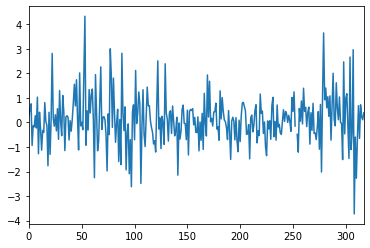

In [33]:
timestamp = response_ssec.json()['chart']['result'][0]['timestamp']
year_close = response_ssec.json()['chart']['result'][0]['indicators']['quote'][0]['close']
year_open =response_ssec.json()['chart']['result'][0]['indicators']['quote'][0]['open']
year_volume =response_ssec.json()['chart']['result'][0]['indicators']['quote'][0]['volume']
year_adjclose =response_ssec.json()['chart']['result'][0]['indicators']['adjclose'][0]['adjclose']

ssec_Dict = {"Timestamp":timestamp,
           "Open":year_open,
          "Close":year_close,
           "Volume":year_volume,
          "Adjclose":year_adjclose
          }
ssec_df = pd.DataFrame(ssec_Dict)

ssec_df['Change %'] = ((ssec_df['Close']-ssec_df['Open'])/ssec_df['Open'])*100

convert_date = []
convert_date = [datetime.datetime.utcfromtimestamp(ssec_df['Timestamp'][x]).strftime('%Y-%m-%d') for x in range(0,len(ssec_df['Timestamp']))]
ssec_df['Date'] = convert_date


ssec_df['Last Year'] =[datetime.datetime.strptime(ssec_df['Date'][x],'%Y-%m-%d')-datetime.timedelta(365) for x in range(0,len(ssec_df['Date']))]

ssec_df2=ssec_df.sort_values(by='Date',ascending=False)
ssec_df2=ssec_df.head(59)
# ssec_df2.head()

ssec_df['Change %'].plot()

In [11]:
volatile_yr_avg = []
yearlyGroups = []
yearlyTimestamp = []

for i in range(0,len(ssec_df['Timestamp'])):
    try:
        cond1 = ssec_df['Timestamp']<=ssec_df['Timestamp'][i]
        cond2 = (pd.Series(ssec_df['Timestamp']>=(ssec_df['Timestamp'][i]-(365*24*60*60))))
        df = ssec_df[cond1 & cond2]
        #print('working')
        if len(df)>237:  #avoids sets less than a full year
            volatile_yr_avg.append(df.std()['Change %']*math.sqrt(len(df))*100) #annual volatility (stdev * sqrt(252))
            yearlyGroups.append(ssec_df['Date'][i]) 
            yearlyTimestamp.append(ssec_df['Timestamp'][i])
            
    except:
        print('Error Found')
volatile_ssec_dict = {"Date":yearlyGroups,
                    "Annual Volatility":volatile_yr_avg,
                     "Timestamp":yearlyTimestamp
                    }
volatile_ssec_df = pd.DataFrame(volatile_ssec_dict)
volatile_ssec_df['Date']=pd.to_datetime(volatile_ssec_df['Date'])
ssec_volatility=volatile_ssec_df.sort_values(by='Date',ascending=False)
ssec_volatility=ssec_volatility.head(59)
ssec_volatility.head()

,Date,Annual Volatility,Timestamp
78,2020-03-27,1529.927667,1585279819
77,2020-03-26,1530.891238,1585186200
76,2020-03-25,1544.675207,1585099800
75,2020-03-24,1545.701317,1585013400
74,2020-03-23,1544.332483,1584927000


In [12]:
italy_df=pd.read_csv("italy_index/FTSE Italia All Share Historical Data.csv")
italy_df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Timestamp
0,2020-3-20,17171.55,17209.93,17628.87,17047.73,1500000000,1.85,1584662400
1,2020-3-19,16859.82,16814.38,17240.13,16438.49,1270000000,2.27,1584576000
2,2020-3-18,16486.21,16372.27,16785.57,16149.48,992760000,-1.17,1584489600
3,2020-3-17,16680.56,16850.34,17238.59,16065.72,1400000000,1.96,1584403200
4,2020-3-16,16360.04,17130.96,17130.96,15498.19,1540000000,-6.06,1584316800


In [13]:
timeseries=italy_df['Price']
print("p-value:",adfuller(timeseries.dropna())[1])

p-value: 0.07486928497033651


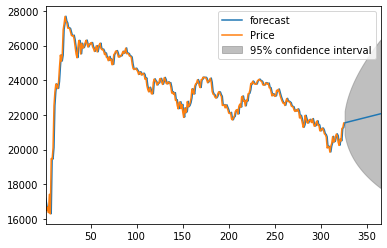

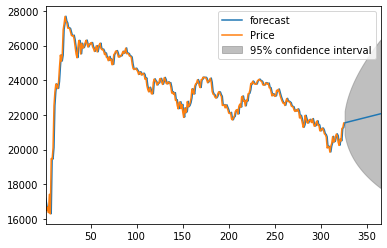

In [14]:
model=ARIMA(timeseries,order=(1,1,0))
results=model.fit()
results.plot_predict(1,365)

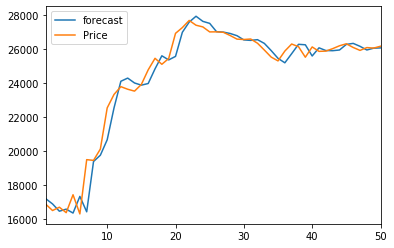

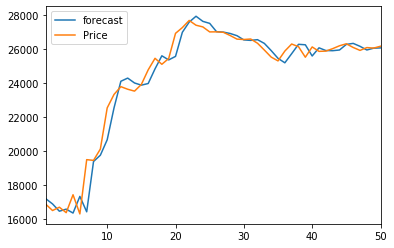

In [15]:
italy_fut=italy_df.drop(['Open','High','Low','Vol.','Change %','Timestamp'],axis=1)
italy_fut['Date']=pd.DatetimeIndex(italy_fut['Date'])
history=italy_fut['Price']
model=ARIMA(history,order=(5,1,0))
model_fit=model.fit()
model_fit.plot_predict(1,50)

# COVID DATA

In [16]:
time_series_2019_ncov_Deaths =pd.read_csv("COVID19_data/time_series_2019-ncov-Deaths.csv")
time_series_2019_ncov_Recovered = pd.read_csv("COVID19_data/time_series_2019-ncov-Recovered.csv")
time_series_2019_ncov_Confirmed = pd.read_csv("COVID19_data/time_series_2019-ncov-Confirmed.csv")
time_series_ncov_Recovered = pd.read_csv("COVID19_data/time_series-ncov-Recovered.csv")
time_series_ncov_Confirmed = pd.read_csv("COVID19_data/time_series-ncov-Confirmed.csv")
time_series_ncov_Deaths = pd.read_csv("COVID19_data/time_series-ncov-Deaths.csv")


In [17]:
#Drop unneeded columns
time_series_ncov_Confirmed =time_series_ncov_Confirmed.drop(columns =['Province/State'])
time_series_ncov_Deaths =time_series_ncov_Deaths.drop(columns =['Province/State'])
time_series_ncov_Recovered =time_series_ncov_Recovered.drop(columns =['Province/State'])

In [18]:
#Removing unecessary rows in each data set

time_series_ncov_Confirmed =time_series_ncov_Confirmed.drop([0], axis = 0)
time_series_ncov_Deaths =time_series_ncov_Deaths.drop([0], axis = 0)
time_series_ncov_Recovered =time_series_ncov_Recovered.drop([0], axis = 0)
time_series_ncov_Deaths.head()



# Changing all value columns to numeric for analysis
time_series_ncov_Confirmed["Value"] = pd.to_numeric(time_series_ncov_Confirmed["Value"])
time_series_ncov_Deaths["Value"] = pd.to_numeric(time_series_ncov_Deaths["Value"])
time_series_ncov_Recovered["Value"] = pd.to_numeric(time_series_ncov_Recovered["Value"])


time_series_ncov_Confirmed["Date"] = pd.to_datetime(time_series_ncov_Confirmed["Date"])
time_series_ncov_Deaths["Date"] = pd.to_datetime(time_series_ncov_Deaths["Date"])
time_series_ncov_Recovered["Date"] = pd.to_datetime(time_series_ncov_Recovered["Date"])

time_series_ncov_Confirmed.dtypes

#Renaming value columns to be easier to analyze

time_series_ncov_Confirmed= time_series_ncov_Confirmed.rename(columns ={'Value':'Confirmed Cases'})
time_series_ncov_Deaths= time_series_ncov_Deaths.rename(columns ={'Value':'Deaths'})
time_series_ncov_Recovered= time_series_ncov_Recovered.rename(columns ={'Value':'Recoveries'})
time_series_ncov_Confirmed.head()

,Country/Region,Lat,Long,Date,Confirmed Cases
1,Afghanistan,33.0,65.0,2020-03-20,24.0
2,Afghanistan,33.0,65.0,2020-03-19,22.0
3,Afghanistan,33.0,65.0,2020-03-18,22.0
4,Afghanistan,33.0,65.0,2020-03-17,22.0
5,Afghanistan,33.0,65.0,2020-03-16,21.0


# Deaths-China & US

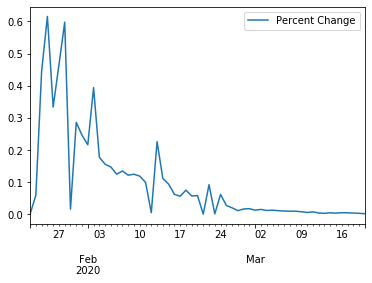

In [19]:
china_cond=time_series_2019_ncov_Deaths['Country/Region']=='China'

china_deaths = time_series_2019_ncov_Deaths[china_cond]
china_deaths =china_deaths.drop(columns =['Lat','Long','Province/State'])
china_deaths = china_deaths.groupby('Country/Region').sum()

china_deaths =china_deaths.T
china_deaths.index = pd.to_datetime(china_deaths.index)
#china_deaths.plot(legend=False)

china_daily = [0]
china_daily_percent = [0]
for i in range(1,len(china_deaths['China'])):
    china_daily.append(china_deaths['China'][i]-china_deaths['China'][i-1])
    if china_deaths['China'][i-1]>0:
        china_daily_percent.append((china_deaths['China'][i]-china_deaths['China'][i-1])/china_deaths['China'][i-1])
    else:
        china_daily_percent.append(0)    
    
    
china_daily_df = china_deaths[['China']]
china_daily_df['Daily']=china_daily
china_daily_df['Percent Change'] = china_daily_percent

#china_daily_df.plot(legend=False)
china_daily_df['Percent Change'].plot(legend=True)

plt.show()

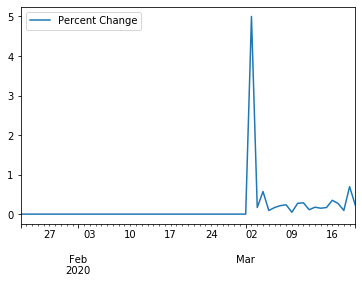

In [20]:
us_cond=time_series_2019_ncov_Deaths['Country/Region']=='US'

us_deaths = time_series_2019_ncov_Deaths[us_cond]
us_deaths =us_deaths.drop(columns =['Lat','Long','Province/State'])
us_deaths = us_deaths.groupby('Country/Region').sum()

us_deaths =us_deaths.T
us_deaths.index = pd.to_datetime(us_deaths.index)
#us_deaths.plot(legend=False)

us_daily = [0]
us_daily_percent = [0]
for i in range(1,len(us_deaths['US'])):
    us_daily.append(us_deaths['US'][i]-us_deaths['US'][i-1])
    if us_deaths['US'][i-1]>0:
        us_daily_percent.append((us_deaths['US'][i]-us_deaths['US'][i-1])/us_deaths['US'][i-1])
    else:
        us_daily_percent.append(0)
us_daily_df = us_deaths[['US']]
us_daily_df['Daily']=us_daily
us_daily_df['Percent Change'] = us_daily_percent

#us_daily_df.plot(legend=False)
us_daily_df['Percent Change'].plot(legend=True)
plt.show()

# Recovered Cases-China & US


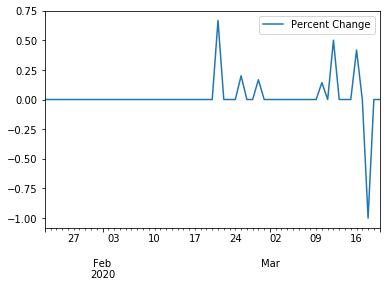

In [21]:
us_cond=time_series_2019_ncov_Recovered['Country/Region']=='US'

us_recovered = time_series_2019_ncov_Recovered[us_cond]
us_recovered =us_recovered.drop(columns =['Lat','Long','Province/State'])
us_recovered = us_recovered.groupby('Country/Region').sum()

us_recovered =us_recovered.T
us_recovered.index = pd.to_datetime(us_recovered.index)
#us_recovered.plot(legend=False)

us_daily = [0]
us_daily_percent = [0]
for i in range(1,len(us_recovered['US'])):
    
    us_daily.append(us_recovered['US'][i]-us_recovered['US'][i-1])
    if us_recovered['US'][i-1]>0:
        us_daily_percent.append((us_recovered['US'][i]-us_recovered['US'][i-1])/us_recovered['US'][i-1])
    else:
        us_daily_percent.append(0)
us_daily_df = us_recovered[['US']]
us_daily_df['Daily']=us_daily
us_daily_df['Percent Change'] = us_daily_percent

#us_daily_df.plot(legend=False)
us_daily_df['Percent Change'].plot(legend=True)
plt.show()

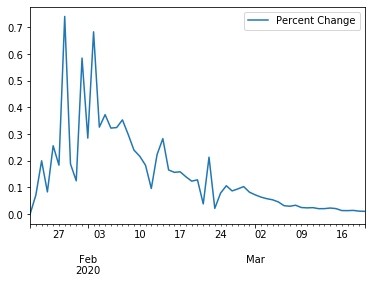

In [22]:
china_cond=time_series_2019_ncov_Recovered['Country/Region']=='China'

china_recovered = time_series_2019_ncov_Recovered[china_cond]
china_recovered =china_recovered.drop(columns =['Lat','Long','Province/State'])
china_recovered = china_recovered.groupby('Country/Region').sum()

china_recovered =china_recovered.T
china_recovered.index = pd.to_datetime(china_recovered.index)
#china_recovered.plot(legend=False)

china_daily = [0]
china_daily_percent = [0]
for i in range(1,len(china_recovered['China'])):
    china_daily.append(china_recovered['China'][i]-china_recovered['China'][i-1])
    if china_recovered['China'][i-1]>0:
        china_daily_percent.append((china_recovered['China'][i]-china_recovered['China'][i-1])/china_recovered['China'][i-1])
    else:
        china_daily_percent.append(0)
        
china_daily_df = china_recovered[['China']]
china_daily_df['Daily']=china_daily
china_daily_df['Percent Change'] = china_daily_percent

china_daily_df.columns=['Total Cases','Daily Cases','Percent Change']
#china_daily_df.plot(legend=False)
china_daily_df['Percent Change'].plot(legend=True)
plt.legend()
plt.show()

# Confirmed Cases-China & US

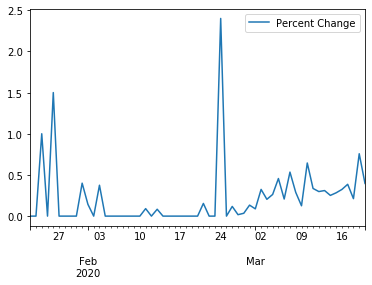

In [23]:
us_cond=time_series_2019_ncov_Confirmed['Country/Region']=='US'

us_confirmed = time_series_2019_ncov_Confirmed[us_cond]
us_confirmed =us_confirmed.drop(columns =['Lat','Long','Province/State'])
us_confirmed = us_confirmed.groupby('Country/Region').sum()

us_confirmed =us_confirmed.T
us_confirmed.index = pd.to_datetime(us_confirmed.index)
#us_confirmed.plot(legend=True,label = "Total Cases")

us_daily = [0]
us_daily_percent = [0]
for i in range(1,len(us_confirmed['US'])):
    us_daily.append(us_confirmed['US'][i]-us_confirmed['US'][i-1])
    if us_confirmed['US'][i-1]>0:
        us_daily_percent.append((us_confirmed['US'][i]-us_confirmed['US'][i-1])/us_confirmed['US'][i-1])
    else:
        us_daily_percent.append(0)
us_daily_df = us_confirmed[['US']]
us_daily_df['Daily']=us_daily
us_daily_df['Percent Change'] = us_daily_percent

us_daily_plot = us_daily_df['Daily']
#us_daily_plot.plot(legend=False,label = "Daily Cases")
us_daily_df['Percent Change'].plot(legend=True)
plt.legend()
plt.show()

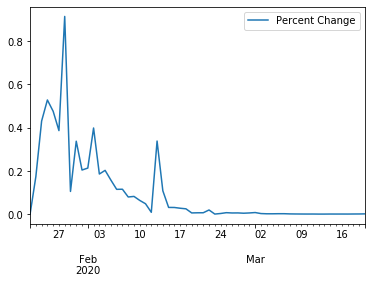

In [24]:
china_cond=time_series_2019_ncov_Confirmed['Country/Region']=='China'

china_confirmed = time_series_2019_ncov_Confirmed[china_cond]
china_confirmed =china_confirmed.drop(columns =['Lat','Long','Province/State'])
china_confirmed = china_confirmed.groupby('Country/Region').sum()

china_confirmed =china_confirmed.T
china_confirmed.index = pd.to_datetime(china_confirmed.index)
#china_confirmed.plot(legend=False)

china_daily = [0]
china_daily_percent = [0]
for i in range(1,len(china_confirmed['China'])):
    china_daily.append(china_confirmed['China'][i]-china_confirmed['China'][i-1])
    if china_confirmed['China'][i-1]>0:
        china_daily_percent.append((china_confirmed['China'][i]-china_confirmed['China'][i-1])/china_confirmed['China'][i-1])
    else:
        china_daily_percent.append(0)
        
china_daily_df = china_confirmed[['China']]
china_daily_df['Daily']=china_daily
china_daily_df['Percent Change'] = china_daily_percent
china_daily_plot = china_daily_df['Daily']
#china_daily_plot.plot(legend=False)
china_daily_df['Percent Change'].plot(legend=True)
plt.show()

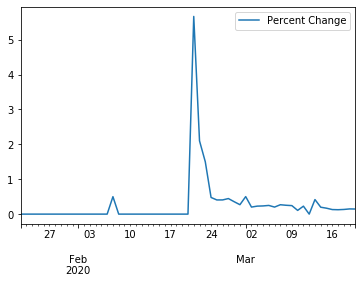

In [25]:
Italy_cond=time_series_2019_ncov_Confirmed['Country/Region']=='Italy'

Italy_confirmed = time_series_2019_ncov_Confirmed[Italy_cond]
Italy_confirmed =Italy_confirmed.drop(columns =['Lat','Long','Province/State'])
Italy_confirmed = Italy_confirmed.groupby('Country/Region').sum()

Italy_confirmed =Italy_confirmed.T
Italy_confirmed.index = pd.to_datetime(Italy_confirmed.index)
#china_confirmed.plot(legend=False)

Italy_daily = [0]
Italy_daily_percent = [0]
for i in range(1,len(Italy_confirmed['Italy'])):
    Italy_daily.append(Italy_confirmed['Italy'][i]-Italy_confirmed['Italy'][i-1])
    if Italy_confirmed['Italy'][i-1]>0:
        Italy_daily_percent.append((Italy_confirmed['Italy'][i]-Italy_confirmed['Italy'][i-1])/Italy_confirmed['Italy'][i-1])
    else:
        Italy_daily_percent.append(0)
        
Italy_daily_df = Italy_confirmed[['Italy']]
Italy_daily_df['Daily']=Italy_daily
Italy_daily_df['Percent Change'] = Italy_daily_percent
Italy_daily_plot = Italy_daily_df['Daily']
#china_daily_plot.plot(legend=False)
Italy_daily_df['Percent Change'].plot(legend=True)
plt.show()

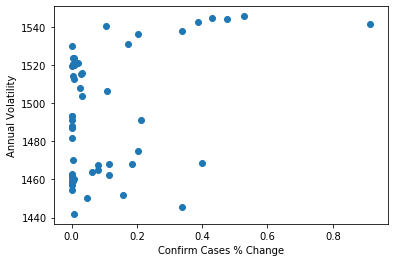

In [26]:
plt.scatter(china_daily_df['Percent Change'],ssec_volatility['Annual Volatility'])
plt.xlabel('Confirm Cases % Change')
plt.ylabel('Annual Volatility')

plt.show()

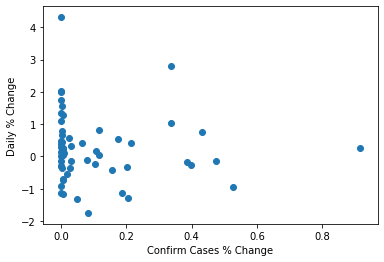

In [27]:
plt.scatter(china_daily_df['Percent Change'],ssec_df2['Change %'])
plt.xlabel('Confirm Cases % Change')
plt.ylabel('Daily % Change')

plt.show()

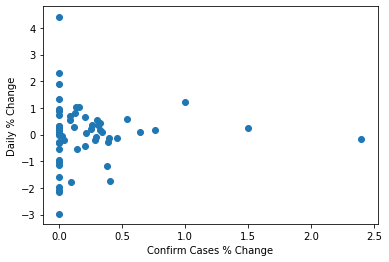

In [28]:
plt.scatter(us_daily_df['Percent Change'],snp_df2['Change %'])
plt.ylabel('Daily % Change')
plt.xlabel('Confirm Cases % Change')

plt.show()

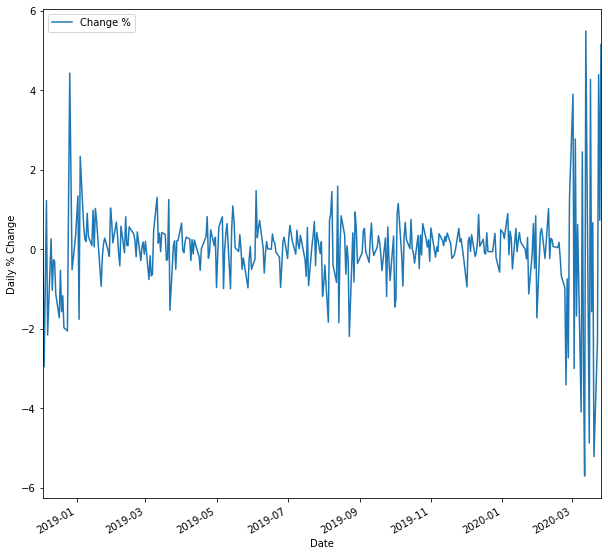

In [29]:
snp_fut=snp_df.drop(['Open','Adjclose','Volume','Close','Timestamp','Last Year'],axis=1)
snp_fut['Date']=pd.DatetimeIndex(snp_fut['Date'])
snp_fut=snp_fut.rename(columns={'Date': 'ds',
                                    'Change %': 'Change %'})

# ax2=ax1.twinx()
# ax2=china_daily_df['Percent Change'].plot(figsize=(10,10))

ax1=snp_fut.set_index('ds').plot(figsize=(10,10))
ax1.set_ylabel('Daily % Change')
ax1.set_xlabel('Date')
plt.show()

In [30]:
Italy_daily_df.reset_index()['index']

0    2020-01-22
1    2020-01-23
2    2020-01-24
3    2020-01-25
4    2020-01-26
5    2020-01-27
6    2020-01-28
7    2020-01-29
8    2020-01-30
9    2020-01-31
10   2020-02-01
11   2020-02-02
12   2020-02-03
13   2020-02-04
14   2020-02-05
15   2020-02-06
16   2020-02-07
17   2020-02-08
18   2020-02-09
19   2020-02-10
20   2020-02-11
21   2020-02-12
22   2020-02-13
23   2020-02-14
24   2020-02-15
25   2020-02-16
26   2020-02-17
27   2020-02-18
28   2020-02-19
29   2020-02-20
30   2020-02-21
31   2020-02-22
32   2020-02-23
33   2020-02-24
34   2020-02-25
35   2020-02-26
36   2020-02-27
37   2020-02-28
38   2020-02-29
39   2020-03-01
40   2020-03-02
41   2020-03-03
42   2020-03-04
43   2020-03-05
44   2020-03-06
45   2020-03-07
46   2020-03-08
47   2020-03-09
48   2020-03-10
49   2020-03-11
50   2020-03-12
51   2020-03-13
52   2020-03-14
53   2020-03-15
54   2020-03-16
55   2020-03-17
56   2020-03-18
57   2020-03-19
58   2020-03-20
Name: index, dtype: datetime64[ns]

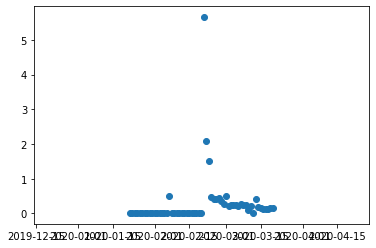

In [31]:
plt.scatter(Italy_daily_df.reset_index()['index'],Italy_daily_df.reset_index()['Percent Change'])


In [32]:
dji_df["Date"]=pd.to_datetime(dji_df["Date"])
#stock price vs confirmed cases
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price')
ax1.plot(italy_df['Date'],italy_df['Price'], label = "Stock Price", color=color)
#plt.xlim(datetime.date(2020,1,1),datetime.date(2020,3,26))
#plt.yscale('symlog')
plt.legend()
plt.xticks(rotation=45)
ax2 = ax1.twinx()
color1 = 'tab:blue'
color2 = 'tab:green'
color3 = 'tab:orange'
ax2.set_ylabel('Daily % Change')
ax2.scatter(Italy_daily_df.reset_index()['index'],Italy_daily_df.reset_index()['Percent Change'])
ax2.scatter(us_daily_df.reset_index()['index'],us_daily_df.reset_index()['Percent Change'])
ax2.scatter(china_daily_df.reset_index()['index'],china_daily_df.reset_index()['Percent Change'])

plt.legend(loc = 'upper right')

plt.show()

No handles with labels found to put in legend.


ValueError: view limit minimum -37242.24779115489 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(us_confirmed['US'], label = "Confirmed Cases")
ax1.plot(us_recovered['US'],label = "Recovered")
ax1.plot(us_deaths['US'], label ="Deaths")
plt.yscale('symlog')
plt.legend()
plt.grid()
plt.xticks(rotation=90)
ax2 = ax1.twinx()
ax2.plot(volatile_snp_df['Date'],volatile_snp_df['Annual Volatility'], label = "Volatility")
plt.legend(loc = 'upper right')
plt.show()



In [ ]:
fig, ax1 = plt.subplots()


ax1.plot(china_confirmed['China'], label = "Confirmed Cases")
ax1.plot(china_recovered['China'],label = "Recovered")
ax1.plot(china_deaths['China'],label = "Deaths")
plt.legend()
plt.xticks(rotation=90)
plt.yscale('symlog')

ax2 = ax1.twinx()
ax2.plot(volatile_ssec_df['Date'],volatile_ssec_df['Annual Volatility'],label = "Volatility")
plt.legend(loc='upper right')
plt.show()